<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [9]:
def gradiente(imagem):

  # Verifica a imagem e se o kernel é ímpar
  if imagem is None:
      print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
      return
  if tamanho_kernel % 2 == 0:
      print("Erro: O do kernel deve ser um número ímpar (ex: 3, 5, 7).")
      return

# Carregar imagem (grayscale)
#a = cv2.imread("fig_3_42.jpg", cv2.IMREAD_GRAYSCALE)

#if a is None:
    #raise ValueError("Erro: Coloque a imagem fig_3_42.jpg na pasta do notebook.")

  # (b) Laplaciano
  laplaciano = cv2.Laplacian(imagem, cv2.CV_64F)
  laplaciano = cv2.convertScaleAbs(laplaciano)

  # (c) Aguçamento = (a) + (b)
  c = cv2.add(imagem, laplaciano)

  # (d) Gradiente de Sobel
  sobelx = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
  sobely = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)
  sobel = cv2.magnitude(sobelx, sobely)
  sobel = cv2.convertScaleAbs(sobel)

  # (e) Suavizar Sobel com média 5x5
  sobel_suave = cv2.blur(sobel, (5,5))

  # (f) Máscara = (c) * (e)
  mascara = cv2.multiply(c, sobel_suave, scale=1/255)  # normalizando

  # (g) Realçada = (a) + (f)
  g = cv2.add(imagem, mascara)

  # (h) Transformação de potência (gamma)
  gamma = 0.5   # escolha do expoente
  g_norm = g / 255.0
  h = np.power(g_norm, gamma)
  h = np.uint8(255 * h)

  # ---- Exibir resultados ----
  plt.figure(figsize=(14,10))

  plt.subplot(2,4,1); plt.imshow(imagem, cmap='gray'); plt.title("(a) Original"); plt.axis("off")
  plt.subplot(2,4,2); plt.imshow(laplaciano, cmap='gray'); plt.title("(b) Laplaciano"); plt.axis("off")
  plt.subplot(2,4,3); plt.imshow(c, cmap='gray'); plt.title("(c) Aguçamento (a+b)"); plt.axis("off")
  plt.subplot(2,4,4); plt.imshow(sobel, cmap='gray'); plt.title("(d) Gradiente Sobel"); plt.axis("off")
  plt.subplot(2,4,5); plt.imshow(sobel_suave, cmap='gray'); plt.title("(e) Sobel Suavizado 5x5"); plt.axis("off")
  plt.subplot(2,4,6); plt.imshow(mascara, cmap='gray'); plt.title("(f) Máscara (c*e)"); plt.axis("off")
  plt.subplot(2,4,7); plt.imshow(g, cmap='gray'); plt.title("(g) Realçada (a+f)"); plt.axis("off")
  plt.subplot(2,4,8); plt.imshow(h, cmap='gray'); plt.title("(h) Potência em (g)"); plt.axis("off")

  plt.tight_layout()
  plt.show()


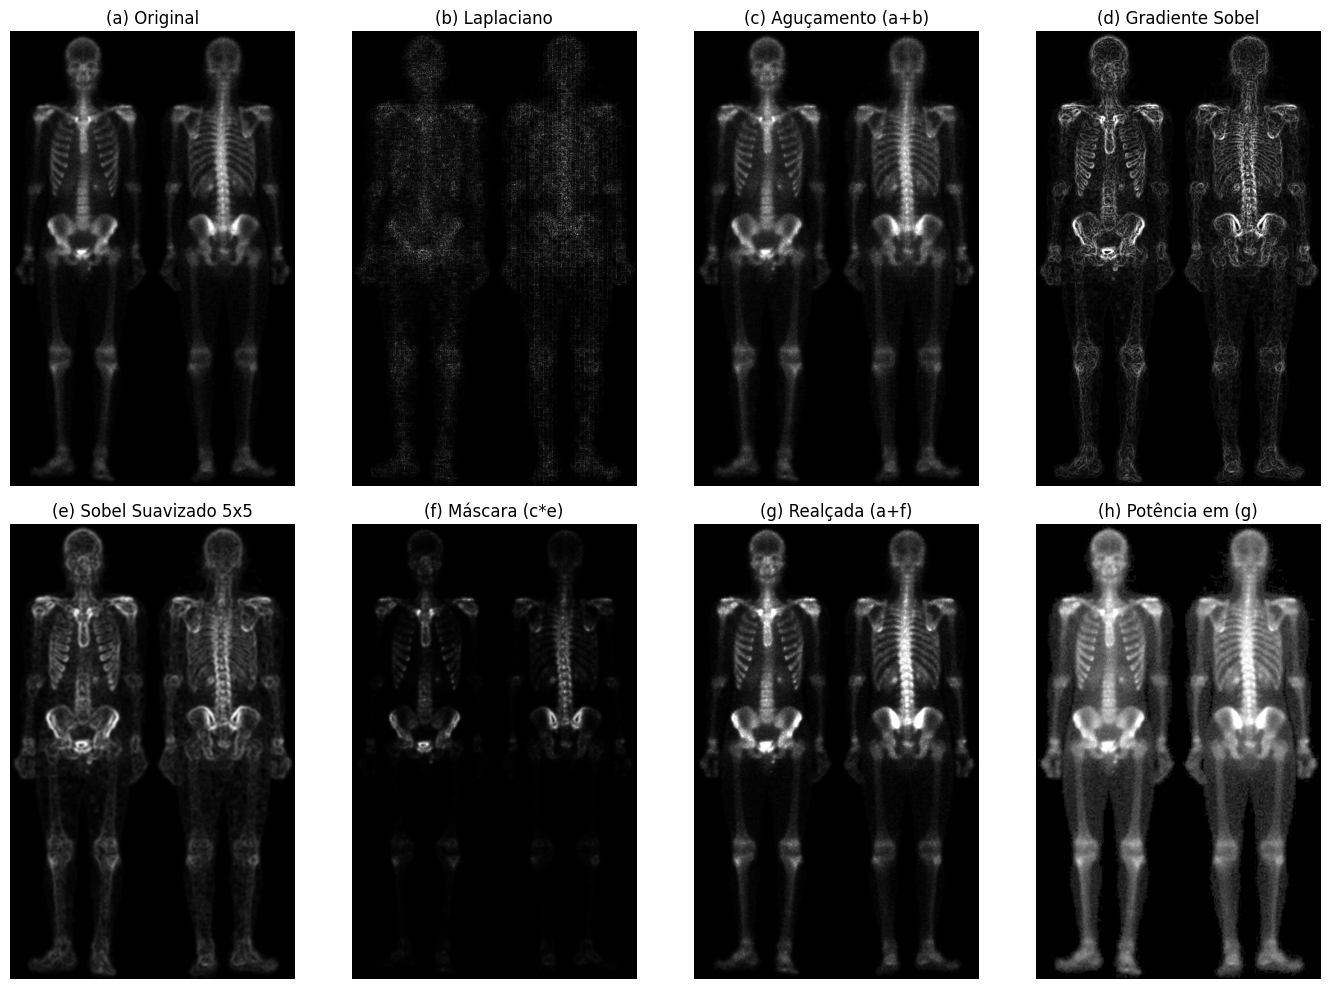

In [13]:
# --- Execução do programa ---

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG034~3.TIF'
#caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_n_5.jpeg'

imagem_ori = cv2.imread(caminho_imgagem, cv2.COLOR_BGR2GRAY)

gradiente(imagem_ori)